In [97]:
#Generating the test data for log analysis.

import random
import gzip
from datetime import datetime, timedelta

# Define log entry template
log_entry_template = '{ip} {identd} {user} [{datetime}] {method} {endpoint} {protocol} {response_code} {content_size}'

# Define IP addresses
ip_addresses = [
    '192.168.1.1', '192.168.1.2', '192.168.1.3', '192.168.1.4', '192.168.1.5',
    '10.0.0.1', '10.0.0.2', '10.0.0.3', '10.0.0.4', '10.0.0.5'
]

# Define user identities
identities = ['-', 'user1', 'user2', 'user3', 'user4']

# Define usernames
usernames = ['-', 'john', 'jane', 'bob', 'alice']

# Define HTTP methods
methods = ['GET', 'POST', 'PUT', 'DELETE', 'HEAD']

# Define endpoints
endpoints = ['/index.html', '/about', '/contact', '/products', '/services']

# Define protocols
protocols = ['HTTP/1.1', 'HTTP/1.0']

# Define response codes
response_codes = [200, 404, 500, 301, 302, 503, 201]

# Define content sizes
content_sizes = [100, 200, 300, 400, 500, 0]

# Generate log entries
log_entries = []
start_date = datetime(2023, 1, 1)
for _ in range(10000):
    ip = random.choice(ip_addresses)
    identd = random.choice(identities)
    user = random.choice(usernames)
    datetime_str = (start_date + timedelta(seconds=random.randint(0, 86400))).strftime('%d/%b/%Y:%H:%M:%S%z')
    method = random.choice(methods)
    endpoint = random.choice(endpoints)
    protocol = random.choice(protocols)
    response_code = random.choice(response_codes)
    content_size = random.choice(content_sizes)

    log_entry = log_entry_template.format(ip=ip, identd=identd, user=user, datetime=datetime_str,
                                          method=method, endpoint=endpoint, protocol=protocol,
                                          response_code=response_code, content_size=content_size)
    log_entries.append(log_entry)

# Write log entries to a file and compress it
with gzip.open('access.log.gz', 'wb') as f:
    for entry in log_entries:
        f.write(f'{entry}\n'.encode())

In [98]:
# Initialize SparkSession
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Generate Sample Apache Logs").getOrCreate()

In [80]:
logs_df = spark.read.text("access.log.gz")

In [81]:
logs_df.show(5, truncate=False)

+-------------------------------------------------------------------------------+
|value                                                                          |
+-------------------------------------------------------------------------------+
|192.168.1.1 user2 jane [01/Jan/2023:15:09:53] DELETE /services HTTP/1.1 302 400|
|192.168.1.1 user1 jane [01/Jan/2023:20:09:41] HEAD /products HTTP/1.0 404 400  |
|10.0.0.3 user1 jane [01/Jan/2023:22:27:45] PUT /contact HTTP/1.0 302 500       |
|192.168.1.3 - jane [01/Jan/2023:16:26:52] GET /index.html HTTP/1.0 200 400     |
|10.0.0.3 user3 alice [01/Jan/2023:06:16:58] GET /about HTTP/1.0 404 200        |
+-------------------------------------------------------------------------------+
only showing top 5 rows



In [82]:
# Data Transformation
from pyspark.sql.functions import col, split

# Data Format '{ip} {identd} {user} [{datetime}] "{method} {endpoint} {protocol}" {response_code} {content_size}'
logs_df = logs_df.withColumn("ip", split(col("value"), " ")[0])
logs_df = logs_df.withColumn("identd", split(col("value"), " ")[1])
logs_df = logs_df.withColumn("user", split(col("value"), " ")[2])
logs_df = logs_df.withColumn("datetime", split(col("value"), " ")[3])
logs_df = logs_df.withColumn("method", split(col("value"), " ")[4])
logs_df = logs_df.withColumn("endpoint", split(col("value"), " ")[5])
logs_df = logs_df.withColumn("protocol", split(col("value"), " ")[6])
logs_df = logs_df.withColumn("response_code", split(col("value"), " ")[7])
logs_df = logs_df.withColumn("content_size", split(col("value"), " ")[8])
logs_df.show(5)

+--------------------+-----------+------+-----+--------------------+------+-----------+--------+-------------+------------+
|               value|         ip|identd| user|            datetime|method|   endpoint|protocol|response_code|content_size|
+--------------------+-----------+------+-----+--------------------+------+-----------+--------+-------------+------------+
|192.168.1.1 user2...|192.168.1.1| user2| jane|[01/Jan/2023:15:0...|DELETE|  /services|HTTP/1.1|          302|         400|
|192.168.1.1 user1...|192.168.1.1| user1| jane|[01/Jan/2023:20:0...|  HEAD|  /products|HTTP/1.0|          404|         400|
|10.0.0.3 user1 ja...|   10.0.0.3| user1| jane|[01/Jan/2023:22:2...|   PUT|   /contact|HTTP/1.0|          302|         500|
|192.168.1.3 - jan...|192.168.1.3|     -| jane|[01/Jan/2023:16:2...|   GET|/index.html|HTTP/1.0|          200|         400|
|10.0.0.3 user3 al...|   10.0.0.3| user3|alice|[01/Jan/2023:06:1...|   GET|     /about|HTTP/1.0|          404|         200|
+-------

In [85]:
# Data Transformation
from pyspark.sql.functions import col, split

# Data Format '{ip} {identd} {user} [{datetime}] "{method} {endpoint} {protocol}" {response_code} {content_size}'

logs_df = logs_df.withColumn("ip", split(col("value"), " ")[0])
logs_df = logs_df.withColumn("identd", split(col("value"), " ")[1])
logs_df = logs_df.withColumn("user", split(col("value"), " ")[2])
logs_df = logs_df.withColumn("datetime", split(col("value"), " ")[3])
logs_df = logs_df.withColumn("method", split(col("value"), " ")[5])
logs_df = logs_df.withColumn("endoint", split(col("value"), " ")[6])
logs_df = logs_df.withColumn("protocol", split(col("value"), " ")[7])
logs_df = logs_df.withColumn("response_code", split(col("value"), " ")[8])
logs_df = logs_df.withColumn("content_size", split(col("value"), " ")[8])
logs_df.show(5)

+--------------------+-----------+------+-----+--------------------+-----------+-----------+--------+-------------+------------+--------+
|               value|         ip|identd| user|            datetime|     method|   endpoint|protocol|response_code|content_size| endoint|
+--------------------+-----------+------+-----+--------------------+-----------+-----------+--------+-------------+------------+--------+
|192.168.1.1 user2...|192.168.1.1| user2| jane|[01/Jan/2023:15:0...|  /services|  /services|     302|          400|         400|HTTP/1.1|
|192.168.1.1 user1...|192.168.1.1| user1| jane|[01/Jan/2023:20:0...|  /products|  /products|     404|          400|         400|HTTP/1.0|
|10.0.0.3 user1 ja...|   10.0.0.3| user1| jane|[01/Jan/2023:22:2...|   /contact|   /contact|     302|          500|         500|HTTP/1.0|
|192.168.1.3 - jan...|192.168.1.3|     -| jane|[01/Jan/2023:16:2...|/index.html|/index.html|     200|          400|         400|HTTP/1.0|
|10.0.0.3 user3 al...|   10.0.0.3|

In [86]:
# Traffic Analysis: Top Endpoints
top_endpoints = logs_df.groupBy("endpoint").count().orderBy("count", ascending=False)
top_endpoints.show(10)

+-----------+-----+
|   endpoint|count|
+-----------+-----+
|     /about| 2037|
|  /products| 2015|
|   /contact| 2015|
|  /services| 1980|
|/index.html| 1953|
+-----------+-----+



In [87]:
# Cast content_size to integer
logs_df = logs_df.withColumn("content_size", col("content_size").cast("int"))

In [88]:
# Top endpoints transferring maximum content
from pyspark.sql.functions import desc
top_endpoints_by_content = logs_df.groupBy("endpoint").sum("content_size") \
    .orderBy(desc("sum(content_size)")).withColumnRenamed("sum(content_size)", "total_content_size")
top_endpoints_by_content.show(10)

+-----------+------------------+
|   endpoint|total_content_size|
+-----------+------------------+
|  /products|            520100|
|     /about|            519000|
|   /contact|            503400|
|  /services|            500200|
|/index.html|            494200|
+-----------+------------------+



In [89]:
# Frequent Visitors who is visiting 

frequent_visitors = logs_df.groupBy("ip").count().filter(col("count") >= 1000).orderBy("count", ascending=False)
frequent_visitors.show()

+--------+-----+
|      ip|count|
+--------+-----+
|10.0.0.3| 1043|
|10.0.0.2| 1036|
|10.0.0.4| 1016|
|10.0.0.5| 1014|
+--------+-----+



In [90]:
# Calculating statistics related to content size 
from pyspark.sql.functions import min, max, avg, count

content_size_stats = logs_df.select( min("content_size").alias("min_content_size"),
                                     max("content_size").alias("max_content_size"),
                                     avg("content_size").alias("total_requests"),
                                     count("content_size").alias("total_requests"))
content_size_stats.show()


+----------------+----------------+--------------+--------------+
|min_content_size|max_content_size|total_requests|total_requests|
+----------------+----------------+--------------+--------------+
|               0|             500|        253.69|         10000|
+----------------+----------------+--------------+--------------+



In [91]:
# Anomaly Detection
#IPs with More Than 1000 Requests

anomalous_ips = logs_df.groupBy("ip").count().filter(col("count") > 1000)
anomalous_ips.show()

+--------+-----+
|      ip|count|
+--------+-----+
|10.0.0.5| 1014|
|10.0.0.2| 1036|
|10.0.0.3| 1043|
|10.0.0.4| 1016|
+--------+-----+



In [99]:
# 404 Requests

latest_404_requests = logs_df.filter(col("response_code") == 404).orderBy(col("datetime"),\
                       ascending=False).select("datetime", "endpoint").limit(10)

latest_404_requests.show(truncate=False)

# Analyzing bad requests (404 errors)
latest_404_requests = logs_df.filter(col("response_code") == 404) \
    .orderBy(desc("timestamp")).select("timestamp", "endpoint").limit(10)
latest_404_requests.show()

+--------+--------+
|datetime|endpoint|
+--------+--------+
+--------+--------+



In [100]:
# Count of Requests by HTTP Method
requests_by_method = logs_df.groupBy("method").count().orderBy("method")
requests_by_method.show()


+-----------+-----+
|     method|count|
+-----------+-----+
|     /about| 1321|
|   /contact| 1307|
|/index.html| 1345|
|  /products| 1357|
|  /services| 1301|
+-----------+-----+



In [103]:
# Response Code Analysis
response_code_analysis = logs_df.groupBy("response_code").count().orderBy("response_code")
response_code_analysis.show()


+-------------+-----+
|response_code|count|
+-------------+-----+
|            0| 1081|
|          100| 1118|
|          200| 1080|
|          300| 1101|
|          400| 1155|
|          500| 1096|
+-------------+-----+



In [102]:
# Calculate percentage of successful requests
total_requests = logs_df.count()
successful_requests = logs_df.filter(col("response_code") == 200).count()
error_requests = total_requests - successful_requests
success_percentage = (successful_requests / total_requests) * 100
error_percentage = 100 - success_percentage
print(f"Successful Requests: {success_percentage:.2f}%")
print(f"Error Requests: {error_percentage:.2f}%")


Successful Requests: 16.29%
Error Requests: 83.71%


In [93]:
# Top visited endpoints
top_visited_endpoints = logs_df.groupBy("endpoint").count() \
    .orderBy(desc("count")).withColumnRenamed("count", "visit_count")
top_visited_endpoints.show(10)

+-----------+-----------+
|   endpoint|visit_count|
+-----------+-----------+
|     /about|       2037|
|  /products|       2015|
|   /contact|       2015|
|  /services|       1980|
|/index.html|       1953|
+-----------+-----------+



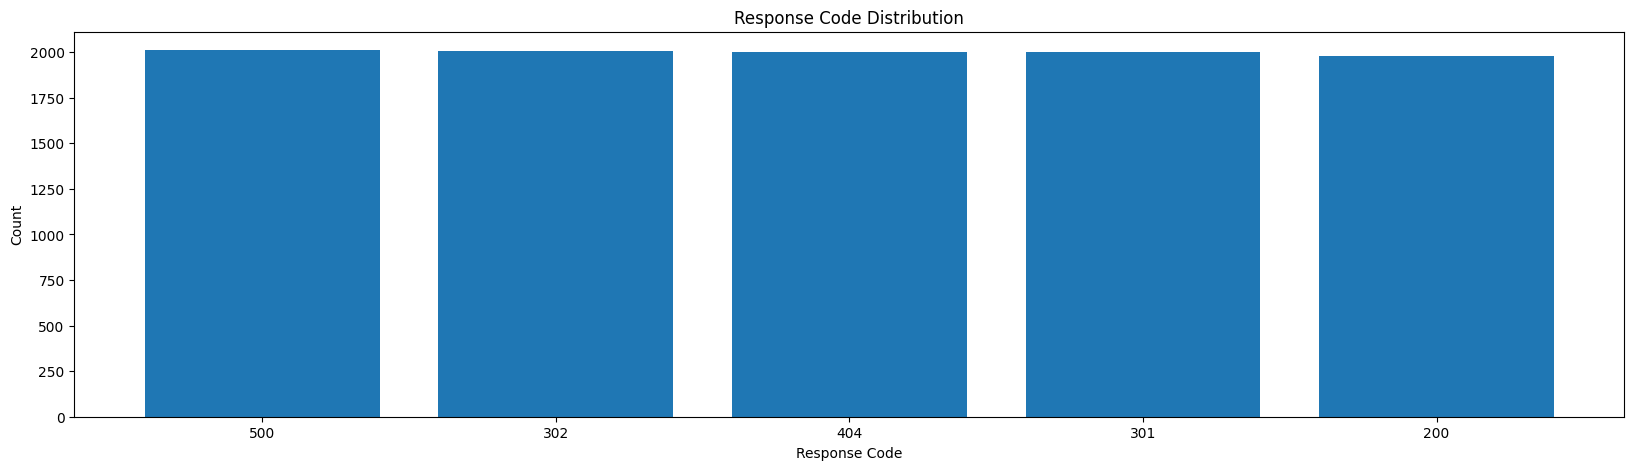

In [105]:
import matplotlib.pyplot as plt

# Example: Plot response code distribution
response_code_pandas = response_code_counts.toPandas()
plt.figure(figsize=(20,5))
plt.bar(response_code_pandas['response_code'], response_code_pandas['count'])
plt.xlabel('Response Code')
plt.ylabel('Count')
plt.title('Response Code Distribution')
plt.show()

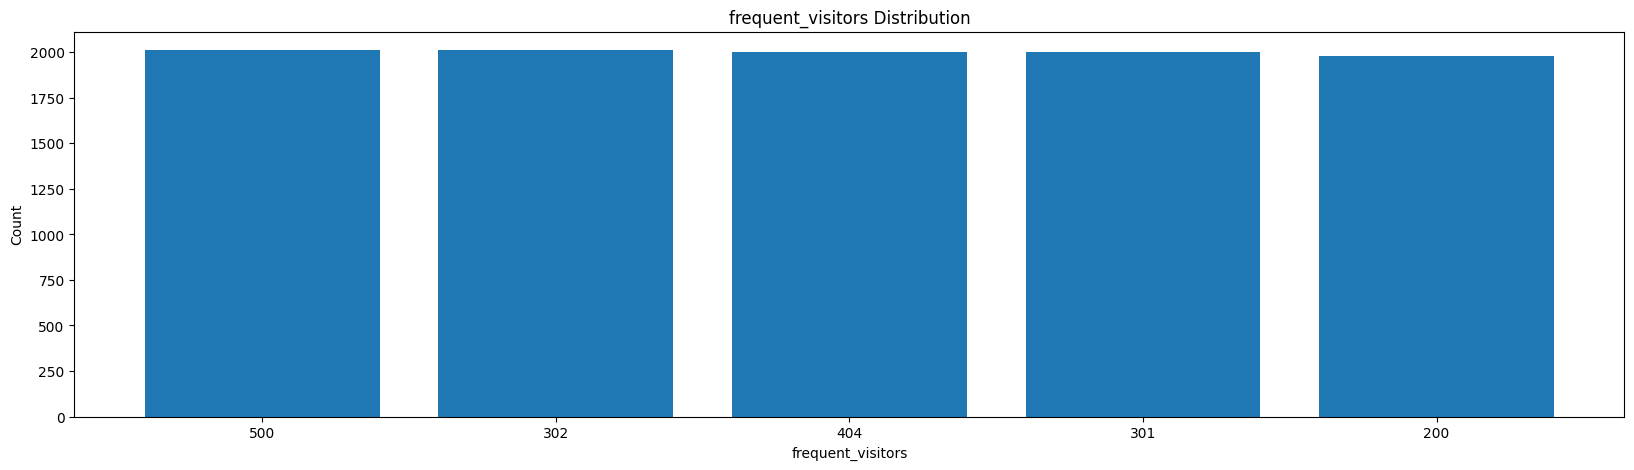

In [96]:
import matplotlib.pyplot as plt

# Example: Plot response code distribution
frequent_visitors_pandas = response_code_counts.toPandas()
plt.figure(figsize=(20,5))
plt.bar(frequent_visitors_pandas['response_code'], frequent_visitors_pandas['count'])
plt.xlabel('frequent_visitors')
plt.ylabel('Count')
plt.title('frequent_visitors Distribution')
plt.show()